In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Problem 1

In [68]:
eps=1
while 1+eps != 1:
    eps= eps/2
print('epsilon',eps)

epsilon 1.1102230246251565e-16


# Problem 2 and 3

In [ ]:
from IPython.display import Image
Image("./hw1.jpg")

# Problem 4

In [ ]:
def euler(delt):
#known constants
    a=1
    e=0.0167
    t=1
    GM=4*np.pi**2

    #simulation input
    nt=int(t/delt)

    #declaring arrays
    ts= np.linspace(0,t,nt)
    vx= np.zeros(nt)
    vy= np.zeros(nt)
    rx= np.zeros(nt)
    ry= np.zeros(nt)

    #initial condition
    vx[0]=-(GM*(1+e)/(1-e))**0.5
    vy[0]=0
    rx[0]=0
    ry[0]=a*(1-e)

    for i in range(len(ts)):
        if i==0:
            continue
        vx[i]=-delt*GM*rx[i-1]/((rx[i-1])**2+(ry[i-1])**2)**(3/2) + vx[i-1]
        vy[i]=-delt*GM*ry[i-1]/((rx[i-1])**2+(ry[i-1])**2)**(3/2) + vy[i-1]
        rx[i]=delt*vx[i-1]+rx[i-1]
        ry[i]=delt*vy[i-1]+ry[i-1]
    
    dist=(rx**2+ry**2)**0.5
    return ts, dist, dist[-1]-dist[0]

In [ ]:
delt=[0.01,0.001,0.0001,0.00001]

for idx, case in enumerate(delt):
    [ts,dist,error]= euler(case)
    print('Error caused in one time period for time step size '+str(case)+ ' is '+str(error))
    plt.plot(ts,dist, label=case)
    plt.rc('text', usetex=True)
    plt.rc('font', size=22)
    plt.ylabel(r'Distance in AU')
    plt.xlabel(r'Time in years')
    plt.gcf().tight_layout()
    plt.legend(fontsize=14, frameon=False)

## In case of explict euler method, for the time step size 1e-4 and below the solution hardly changes as shown in the figure.

In [64]:
def RK4(delt):
    a=1
    e=0.0167
    t=1
    GM=4*np.pi**2
    
    #simulation input
    nt=int(t/delt)+1

    #declaring arrays
    ts= np.linspace(0,t,nt)
    vx= np.zeros(nt)
    vy= np.zeros(nt)
    rx= np.zeros(nt)
    ry= np.zeros(nt)

    #initial condition
    vx[0]=-(GM*(1+e)/(1-e))**0.5
    vy[0]=0
    rx[0]=0
    ry[0]=a*(1-e)

    #function definitions
    def RK4vx(rx,ry):
        return -GM*rx/((rx)**2+(ry)**2)**(3.0/2.0)

    def RK4vy(rx,ry):
        return -GM*ry/((rx)**2+(ry)**2)**(3.0/2.0)

    for i in range(len(ts)):
        if i==0:
            continue
        kv1x=RK4vx(rx[i-1],ry[i-1])
        kv1y=RK4vy(rx[i-1],ry[i-1])
        kr1x=vx[i-1]
        kr1y=vy[i-1]

        
        kv2x=RK4vx(rx[i-1]+delt/2*kr1x,ry[i-1]+delt/2*kr1y)
        kv2y=RK4vy(rx[i-1]+delt/2*kr1x,ry[i-1]+delt/2*kr1y)
        kr2x=vx[i-1]+delt/2*kv1x
        kr2y=vy[i-1]+delt/2*kv1y

        kv3x=RK4vx(rx[i-1]+delt/2*kr2x,ry[i-1]+delt/2*kr2y)
        kv3y=RK4vy(rx[i-1]+delt/2*kr2x,ry[i-1]+delt/2*kr2y)
        kr3x=vx[i-1]+delt/2*kv2x
        kr3y=vy[i-1]+delt/2*kv2y

        
        kv4x=RK4vx(rx[i-1]+delt*kr3x,ry[i-1]+delt*kr3y)
        kv4y=RK4vy(rx[i-1]+delt*kr3x,ry[i-1]+delt*kr3y)
        kr4x=vx[i-1]+delt*kv3x
        kr4y=vy[i-1]+delt*kv3y
        
        vx[i]=vx[i-1]+delt/6*(kv1x+2*kv2x+2*kv3x+kv4x)
        vy[i]=vy[i-1]+delt/6*(kv1y+2*kv2y+2*kv3y+kv4y)

        rx[i]=rx[i-1]+delt/6*(kr1x+2*kr2x+2*kr3x+kr4x)
        ry[i]=ry[i-1]+delt/6*(kr1y+2*kr2y+2*kr3y+kr4y)
    dist=(rx**2+ry**2)**0.5
    return ts, dist, np.sqrt((rx[-1]-rx[0])**2+(ry[-1]-ry[0])**2)

Error caused in one time period for time step size 0.1 is 0.1107625050165327
Error caused in one time period for time step size 0.01 is 2.997887339465172e-06
Error caused in one time period for time step size 0.001 is 2.2535989371523324e-10
Error caused in one time period for time step size 0.0001 is 8.751527878045009e-15


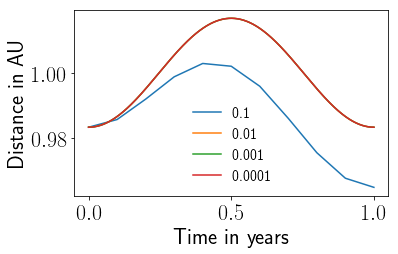

In [70]:
delt=[0.1,0.01,0.001,0.0001]

for idx, case in enumerate(delt):
    [ts,dist,error]= RK4(case)
    print('Error caused in one time period for time step size '+str(case)+ ' is '+str(error))
    plt.plot(ts,dist, label=case)
    plt.rc('text', usetex=True)
    plt.rc('font', size=22)
    plt.ylabel(r'Distance in AU')
    plt.xlabel(r'Time in years')
    plt.gcf().tight_layout()
    plt.legend(fontsize=14, frameon=False)

## In case of Runge Kutta 4th order method, for the time step size 1e-5 and below the solution hardly changes as shown in the figure

In [29]:
def dxdt(x,t):
    xp=np.zeros([4])
    gm=4.*np.pi*np.pi
    r=np.sqrt(x[0]**2.+x[1]**2.)
    xp[0:2]=x[2:]
    xp[2]=-gm*x[0]/(r**3.)
    xp[3]=-gm*x[1]/(r**3.)
    return xp

In [30]:
a=1.
e=0.02
gm=4.*np.pi*np.pi
x0=np.array([0.,a*(1.-e),-np.sqrt((gm/a)*(1.+e)/(1.-e)),0.])
t0=0.

In [31]:
dt=1e-4
tmax=1.
nts=int(tmax/dt)
xs_hist=np.zeros([4,nts])
ts_hist=np.zeros([nts])
t=t0
x=x0

In [33]:
for i in range(nts):
    k1=dxdt(x,t)
    k2=dxdt(x+k1*0.5*dt,t+dt*0.5)
    k3=dxdt(x+k2*0.5*dt,t+dt*0.5)
    k4=dxdt(x+k3*dt, t+dt)
    x=x+(k1+k2*2.+k3*2.+k4)*dt/6.
    t=t+dt
    xs_hist[:,i]=x
    ts_hist[i]=t

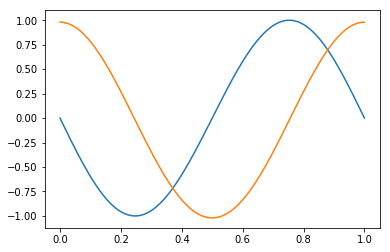

In [34]:
plt.plot(ts_hist,xs_hist[0,:])
plt.plot(ts_hist,xs_hist[1,:])
plt.show()

In [35]:
np.sqrt((xs_hist[0,-1]-x0[0])**2.+(xs_hist[1,-1]-x0[1])**2.)

9.616209326897909e-14